In [1]:
import os
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
results_dir = os.path.join(os.pardir, "results")
graphs_dir = os.path.join(os.pardir, "graphs")
program = "coloring"  # coloring, dijkstra_token_ring, maximal_matching, maximal_independent_set
analysis_type = "full"  # full, partial
graph_names = ["graph_1", "graph_2", "graph_3", "graph_4", "graph_5", "graph_6", "graph_7", "graph_8"]
plots_dir = os.path.join("plots", program)

In [3]:
def get_graph(graph_name):
    full_path = os.path.join(
        graphs_dir,
        f"{graph_name}.txt"
    )
    graph = {}
    with open(full_path, "r") as f:
        line = f.readline()
        while line:
            node_edges = [int(i) for i in line.split()]
            node = node_edges[0]
            edges = node_edges[1:]
            graph[node] = set(edges)
            line = f.readline()
    return graph

In [4]:
get_graph(graph_names[0])

{0: {1, 2, 3, 4, 5, 6, 7, 8, 9},
 1: {0},
 2: {0},
 3: {0},
 4: {0},
 5: {0},
 6: {0},
 7: {0},
 8: {0},
 9: {0}}

In [5]:
def get_df(graph_name):
    full_path = os.path.join(
        results_dir,
        program,
        f"rank_effect_by_node__{analysis_type}__{program}__{graph_name}.csv",
    )
    if not os.path.exists(full_path):
        print("File not found:", full_path)
        return None

    df = pd.read_csv(full_path)
    df["CVF (Avg)"] = df["CVF In (Avg)"] + df["CVF Out (Avg)"]
    graph = get_graph(graph_name)
    degree_of_nodes = {n: len(graph[n]) for n in graph}
    df["Node Degree"] = df.apply(lambda x: degree_of_nodes[x["Node"]], axis=1)
    # df["CVF (Max)"] = df["CVF In (Max)"] + df["CVF Out (Max)"]
    return df

In [6]:
def create_plots_dir_if_not_exists():
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)

create_plots_dir_if_not_exists()

In [7]:
def plot_node_degree_vs_rank_effect(df, ax):
    sns.barplot(data=df, x="Node Degree", y="Rank Effect", ax=ax)
    ax.set_ylim(bottom=0)

File not found: ../results/coloring/rank_effect_by_node__full__coloring__graph_3.csv
File not found: ../results/coloring/rank_effect_by_node__full__coloring__graph_4.csv
File not found: ../results/coloring/rank_effect_by_node__full__coloring__graph_5.csv
File not found: ../results/coloring/rank_effect_by_node__full__coloring__graph_8.csv


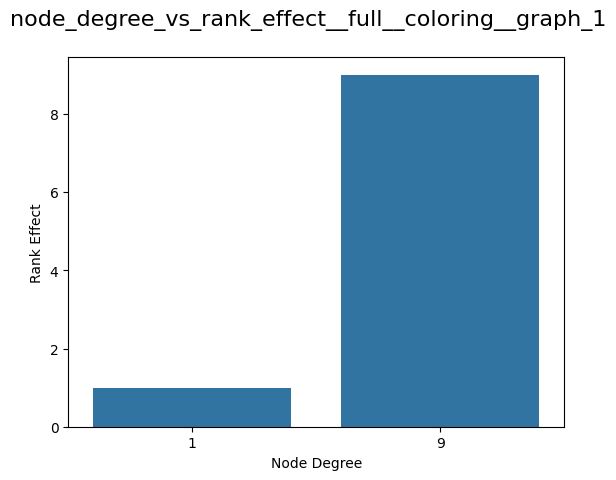

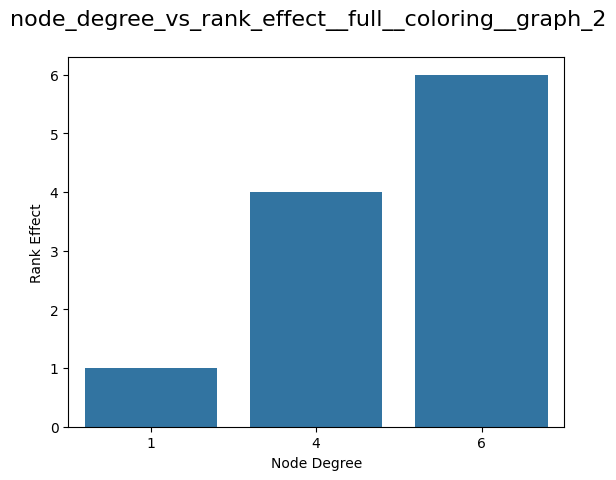

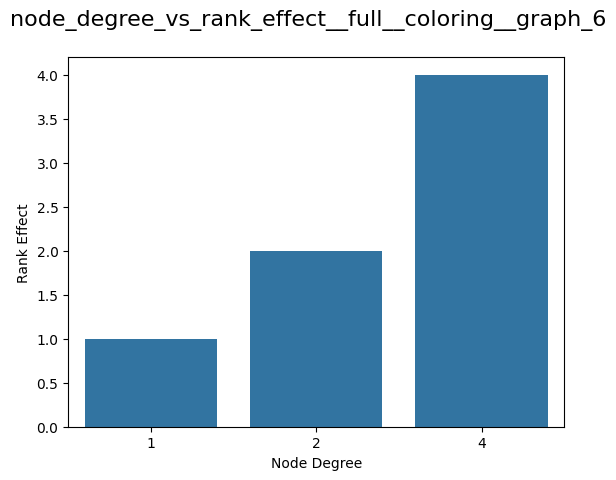

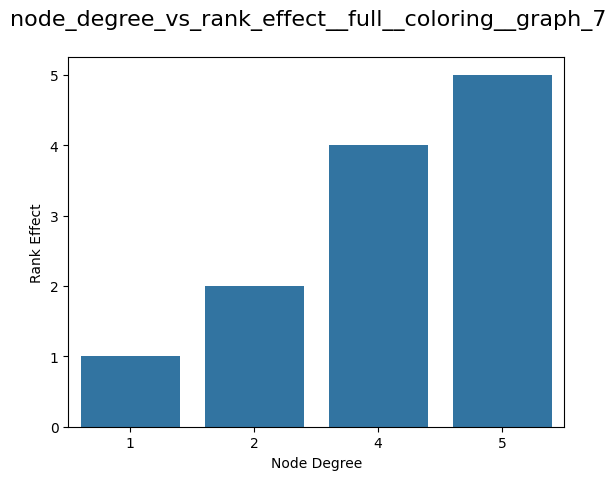

In [8]:
for graph_name in graph_names:
    df = get_df(graph_name)
    if df is None:
        continue
    node_degree_vs_rank_effect = df[df['CVF (Avg)'] > 0].groupby(["Node Degree"]).agg({"Rank Effect": ["max"]}).droplevel(1, axis=1) 
    fig, ax = plt.subplots(1)
    fig_title = f"node_degree_vs_rank_effect__{analysis_type}__{program}__{graph_name}"
    fig.suptitle(fig_title, fontsize=16)
    plot_node_degree_vs_rank_effect(node_degree_vs_rank_effect, ax)